<a href="https://colab.research.google.com/github/DavidGlezGmz/Logistic-Regression/blob/main/Logistic_Regession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import cm #Color Map
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [20]:
cmap_bold = ListedColormap (["#FF0000", "0000FF"])
cmap_light = ListedColormap(["FFBBB","#BBBBFF"])

**Useful Functions**

In [21]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

def cross_entropy(y, p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy (y, y_hat):
  return np.mean (y==y_hat)

In [22]:
class SimpleLogisticRegresion():

  def __init__(self, thresh=0.5):
    self.thresh = thresh
    self.W = None
    self.B = None

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve = False):
    epochs = int(epochs)
    N, D = X.shape

    #Initialize Weights and Bias
    self.W = np.random.randn(D)
    self.B = np.random.randn(1)

    J = np.zeros(epochs)

    for epoch in range(epochs):
      p_hat = self.__forward__(X)
      J[epoch] = cross_entropy(y,p_hat)
      
      self.W -= eta*(1/N)*X.T@(p_hat-y) 
      self.B -= eta*(1/N)*np.sum(p_hat-y) 

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$/mathcal(J)$")
      plt.title("Training Curve")

  def __forward__(self, X):
    return sigmoid(X@self.W+self.B)
  
  def predict(self, X):
    return (self.__forward__(X) >= self.thresh).astype(np.int32)


In [23]:
def main():
  
  N = 1000
  D = 2

  X0 = np.random.randn((N//2),D) + np.array([1,1])
  X1 = np.random.randn((N//2),D) + np.array([-1,-1])

  X = np.vstack((X0,X1))
  y = np.array([0]*(N//2) + [1]*(N//2))

  #print(X)
  #print(X.shape)

  #print(y)
  #print(y.shape)

  plt.figure()
  plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=7)

  log_reg = SimpleLogisticRegresion()
  log_reg.fit(X, y, eta=1e-2, epochs= 1e4, show_curve=True)
  y_hat = log_reg.predict(X)

  print(f"Training Accuracy: {accuracy(y, y_hat):0.4f}")

  X1=np.linspace(X[:,0].min()-1, X[:,1].max()+0.5, 1000)
  X2=-(log_reg.B/log_reg.W[1])-(log_reg.W[0]/log_reg.W[1])*X1

  plt.figure()
  plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=7)
  plt.plot(X1,X2, color = "#000000", linewidth=2)


Training Accuracy: 0.9270


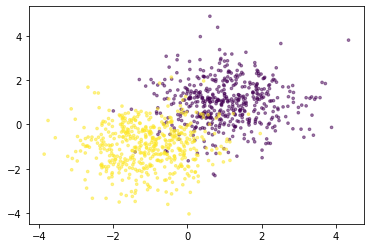

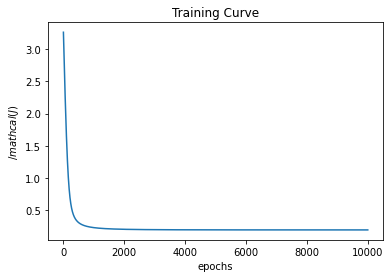

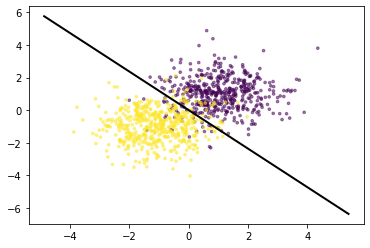

In [24]:
if __name__=="__main__":
  main()